In [36]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [37]:
confirmed.shape

(289, 1147)

In [38]:
last_date = "12/2/20"
confirmed[last_date]

0      46717
1      39719
2      85084
3       6842
4      15319
       ...  
284    90192
285        0
286     2077
287    17700
288    10129
Name: 12/2/20, Length: 289, dtype: int64

In [39]:
confirmed["Country/Region"]

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object

In [40]:
confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [41]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
3/5/23                 209390
3/6/23                 209406
3/7/23                 209436
3/8/23                 209451
3/9/23                 209451
Name: 0, Length: 1147, dtype: object

In [42]:
confirmed.set_index('Province/State').loc["Anhui"]

Country/Region       China
Lat                31.8257
Long              117.2264
1/22/20                  1
1/23/20                  9
                    ...   
3/5/23                2275
3/6/23                2275
3/7/23                2275
3/8/23                2275
3/9/23                2275
Name: Anhui, Length: 1146, dtype: object

In [43]:
confirmed['Country/Region'].value_counts()
# Valor falso pois o erro é muito grande so conseguimos extrair 
# a quantidades de regioes reportadas
# e campo sera descartado pois tem muito campo vazio (muita disparidade no padrao)


Country/Region
China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: count, Length: 201, dtype: int64

In [44]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [45]:
confirmed_by_country.loc['China'][2:]

Long       3688.9377
1/22/20          548
1/23/20          643
1/24/20          920
1/25/20         1406
             ...    
3/5/23       4903524
3/6/23       4903524
3/7/23       4903524
3/8/23       4903524
3/9/23       4903524
Name: China, Length: 1144, dtype: object

Text(0.5, 1.0, 'Casos confirmados na China')

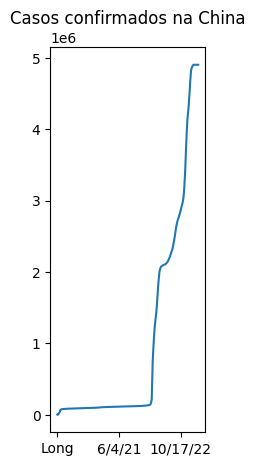

In [46]:
import matplotlib.pyplot as plt

# Extremamente pequeno estamos sendo longe do adequando 
# ao passara msg errada
plt.figure(figsize= (2,5))
confirmed_by_country.loc['China'][2:].plot()
plt.title("Casos confirmados na China")



Text(0.5, 1.0, 'Casos confirmados na China')

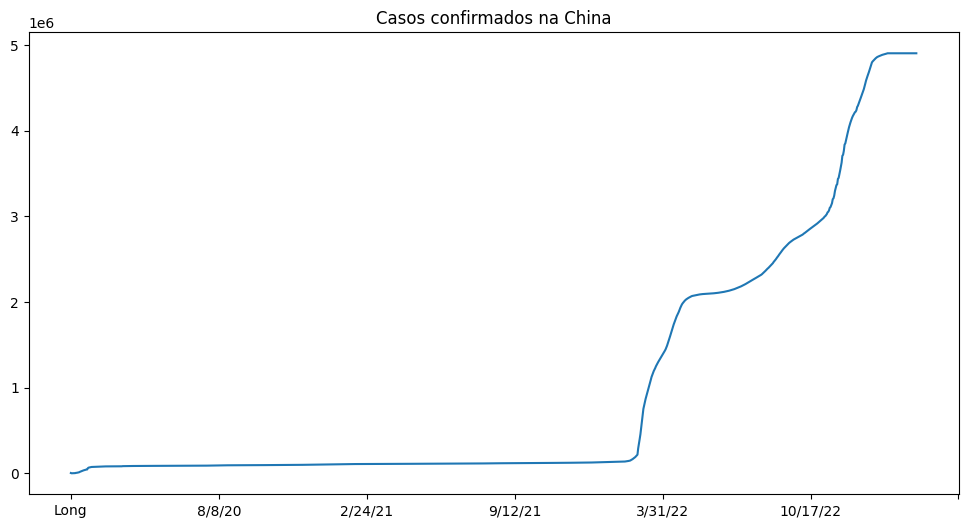

In [47]:
import matplotlib.pyplot as plt

# por isso em data visualization
# e fundamentar estar atentos nos dois exos
plt.figure(figsize= (12,6))
confirmed_by_country.loc['China'][2:].plot()
plt.title("Casos confirmados na China")



(0.0, 300000.0)

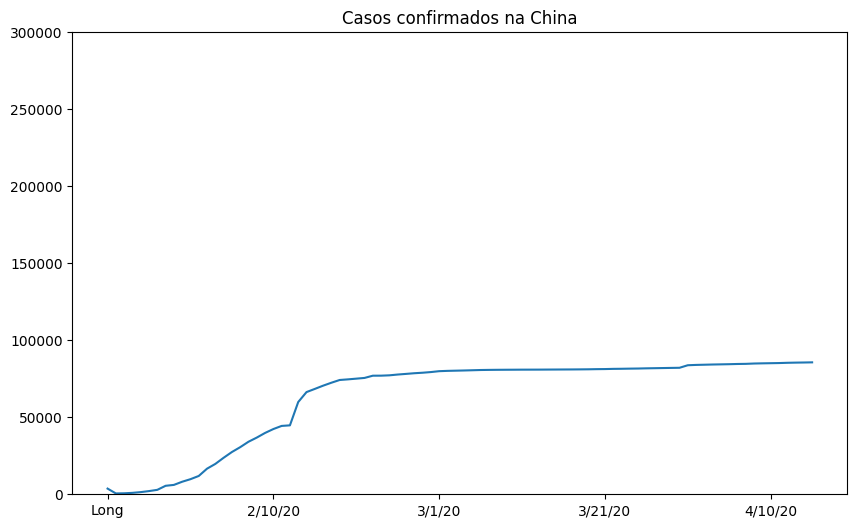

In [48]:
import matplotlib.pyplot as plt

# exemplo rim de manusear o eixo y
plt.figure(figsize= (10,6))
confirmed_by_country.loc['China'][2:88].plot()
plt.title("Casos confirmados na China")
plt.ylim(0, 300000)


<AxesSubplot: >

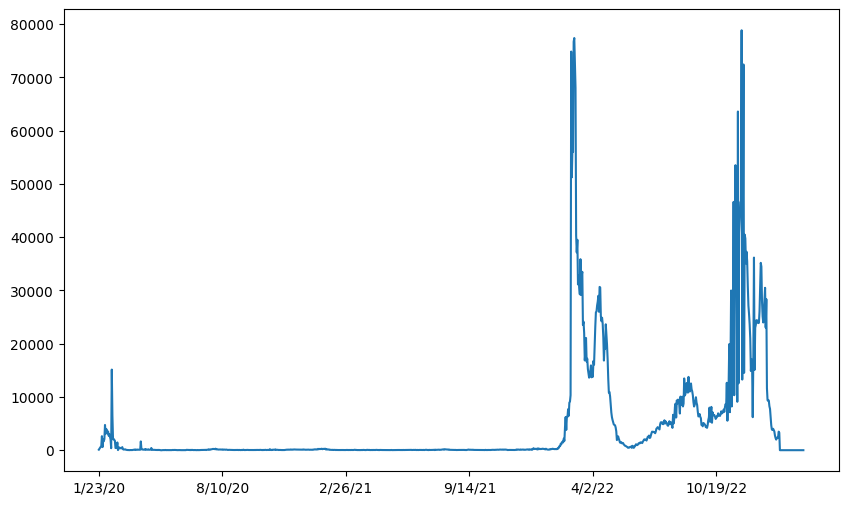

In [49]:
plt.figure(figsize= (10,6))
new_cases_china = confirmed_by_country.loc['China'][3:].diff().dropna()
new_cases_china.plot()

Country/Region
Afghanistan             46717
Albania                 39719
Algeria                 85084
Andorra                  6842
Angola                  15319
                        ...  
West Bank and Gaza      90192
Winter Olympics 2022        0
Yemen                    2077
Zambia                  17700
Zimbabwe                10129
Name: 12/2/20, Length: 201, dtype: int64


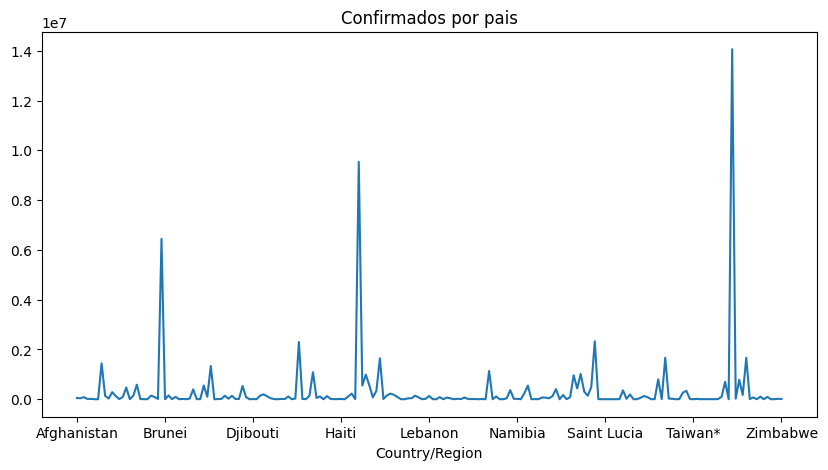

In [50]:
plt.figure(figsize=(10,5))
confirmed_by_country[last_date].plot()
plt.title('Confirmados por pais')

print(confirmed_by_country[last_date])

Text(0.5, 1.0, 'Confirmados por pais')

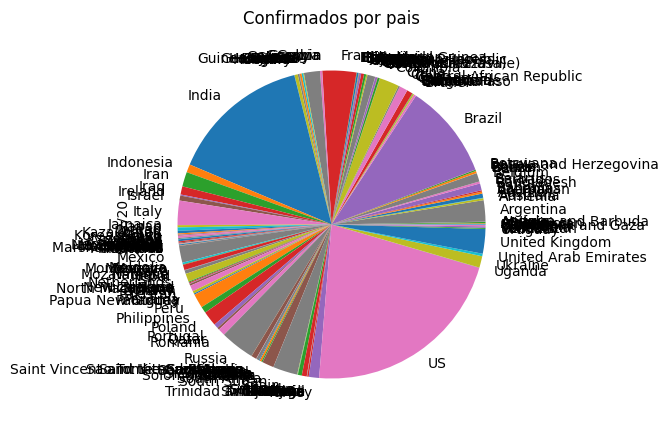

In [51]:
plt.figure(figsize=(10,5))
confirmed_by_country[last_date].plot(kind = 'pie')
plt.title('Confirmados por pais')

Text(0.5, 1.0, 'Confirmados por pais')

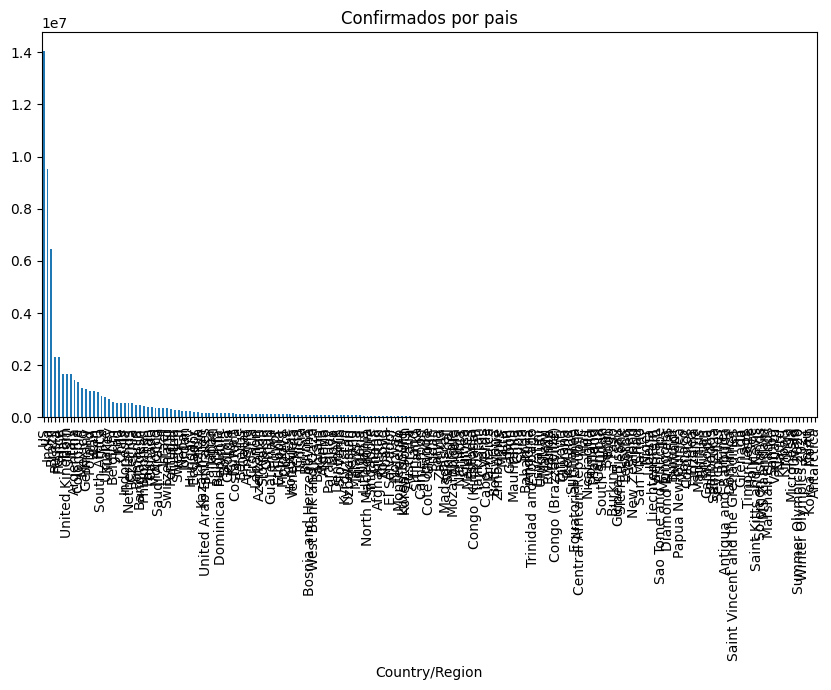

In [52]:
plt.figure(figsize=(10,5))
confirmed_by_country[last_date].sort_values(ascending= False).plot(kind = 'bar')
plt.title('Confirmados por pais')

Text(0.5, 1.0, 'Confirmados por pais')

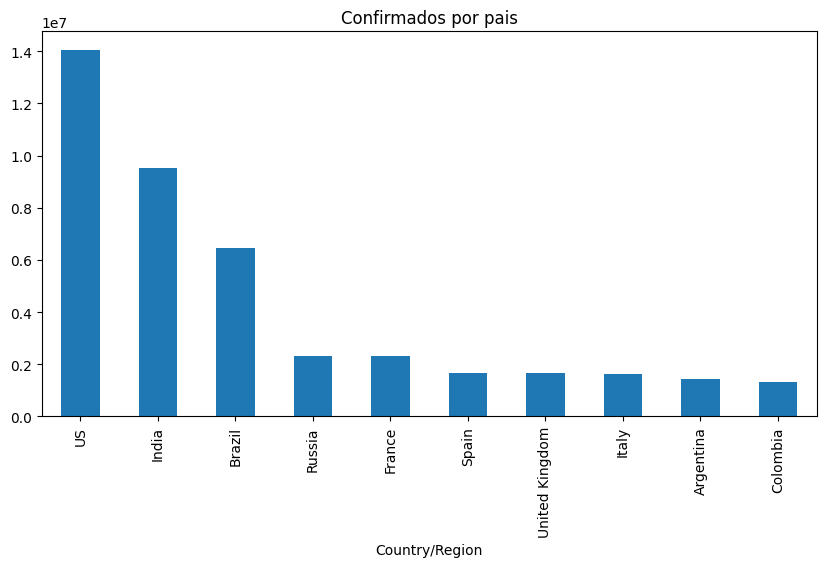

In [53]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending= False,)[:10].plot(kind = 'bar')
plt.title('Confirmados por pais')

Text(0.5, 1.0, 'Confirmados por pais')

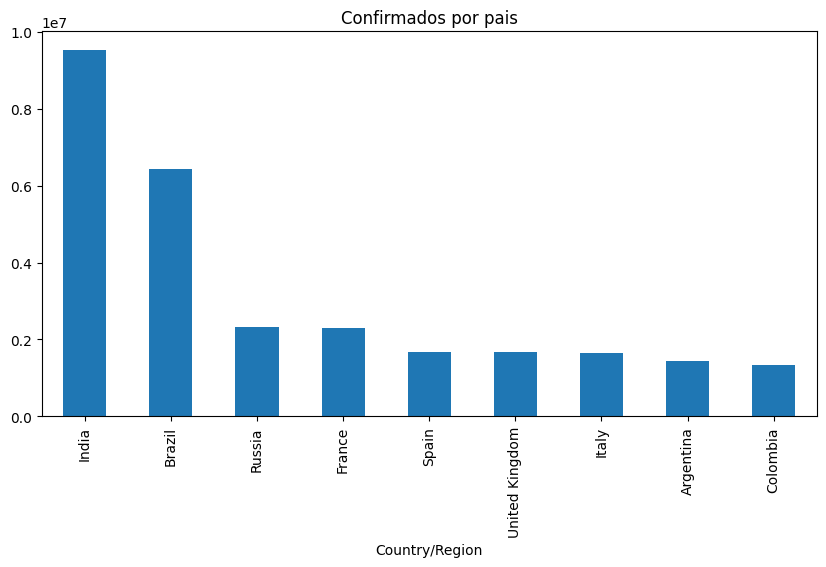

In [54]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending= False,)[1:10].plot(kind = 'bar')
plt.title('Confirmados por pais')
#salvo

In [55]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("data/time_series_covid19_recovered_global.csv")
display(deaths.head())
display(recovered.head())


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
def latest_by_country(data):
    return data.groupby("Country/Region").sum().iloc[:,365]

latest_by_country(confirmed).head()

Country/Region
Afghanistan     54062
Albania         67982
Algeria        104092
Andorra          9083
Angola          18926
Name: 1/18/21, dtype: int64

In [57]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,54062,2343,46359
Albania,67982,1281,40870
Algeria,104092,2840,70747
Andorra,9083,91,8154
Angola,18926,439,16677


In [58]:
# taxa de letalidade é expressa em %
# o numero de casos letais dentro dos cassos que foram letais e nao letais

# imagina que existe uma doenca que em janeiro de 2020 afetou 100 pessoas
# 5 pessoas morreram por exemplo letalidade de 5%
# e a doença deixou de existr pela hisoria da humanidade
# nao digoque é de 5 por cento para sempre se a doença continuar existindo
# pois a humanidade troca os meios de tratamento sendo assim podendo evoluir 
# os tratamentos assim diminuindo a taxa de letalidade


In [59]:
sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)
print(sum_up)


2.2225356731232524
3.8899996291990293
confirmed    95914366
deaths        2131731
recovered    52668557
dtype: int64


In [60]:
letality_rate_1 = combined['deaths']/ combined['confirmed'] * 100
letality_rate_2 = combined['deaths']/( combined['recovered'] + combined['deaths'] )* 100
combined['letality_rate_2'] = letality_rate_2
combined['letality_rate_1'] = letality_rate_1

combined.head()

,confirmed,deaths,recovered,letality_rate_2,letality_rate_1
Country/Region,,,,,
Afghanistan,54062,2343,46359,4.810891,4.333913
Albania,67982,1281,40870,3.039074,1.884322
Algeria,104092,2840,70747,3.859377,2.728356
Andorra,9083,91,8154,1.103699,1.001872
Angola,18926,439,16677,2.564852,2.319560


In [61]:
combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_2,letality_rate_1
Country/Region,,,,,
Yemen,2113,612,1421,30.103296,28.963559
MS Zaandam,9,2,7,22.222222,22.222222
Peru,1060567,97325,984726,8.994493,9.176695
Mexico,1649502,141248,1237321,10.245987,8.563069
Syria,13132,841,6624,11.265908,6.404203
Ecuador,231644,14322,199332,6.703362,6.182763
Sudan,28317,1603,15688,9.270719,5.660910
Egypt,157275,8638,123491,6.537550,5.492291
Bolivia,188733,9680,144227,6.289512,5.128939


<AxesSubplot: xlabel='Country/Region'>

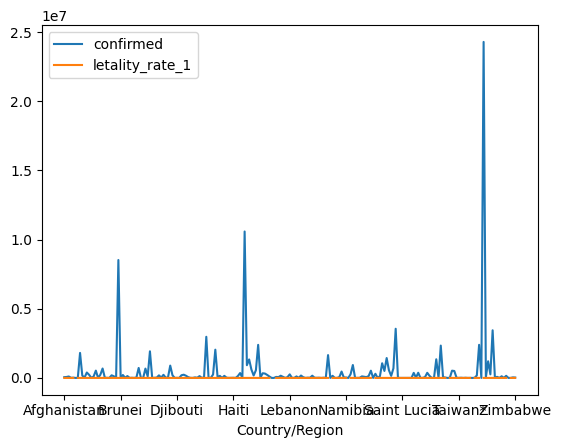

In [62]:
#vizualizaçao prejudicada pelo principal mtivo da taxa de letalidade
# sair do 0 enquanto o indice de confirmados ser representado por numeros altos

combined[['confirmed', 'letality_rate_1']].plot()

<AxesSubplot: xlabel='confirmed', ylabel='letality_rate_1'>

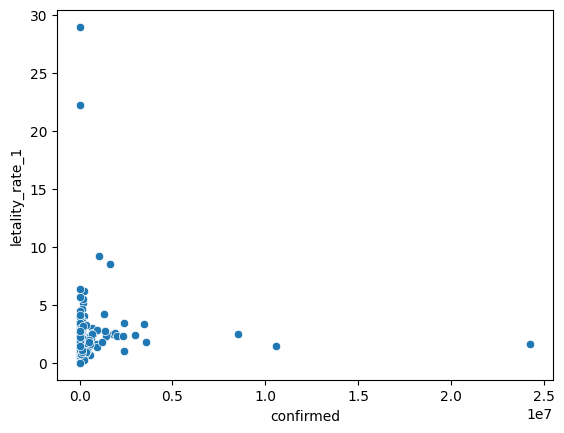

In [63]:
import seaborn as sns

sns.scatterplot(data= combined, x= 'confirmed', y= 'letality_rate_1' )
        

<AxesSubplot: xlabel='confirmed', ylabel='letality_rate_1'>

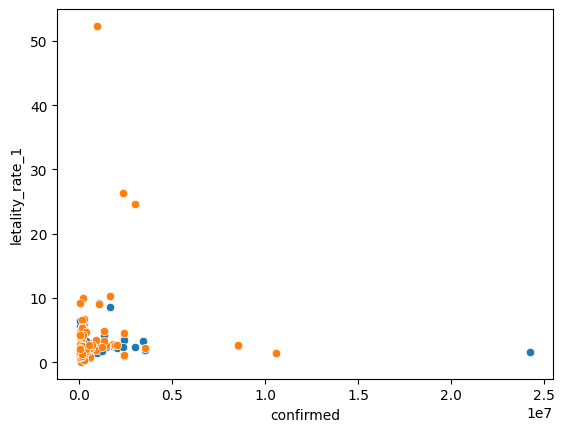

In [64]:
sns.scatterplot(data= combined.query("confirmed > 10000"), x= 'confirmed', y= 'letality_rate_1' )
sns.scatterplot(data= combined.query("recovered > 10000"), x= 'confirmed', y= 'letality_rate_2' )


C:\Users\luist\AppData\Local\Temp\ipykernel_10132\1490809599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.query("confirmed > 10000")['letality_rate_1'], kde= False)


<AxesSubplot: xlabel='letality_rate_1'>

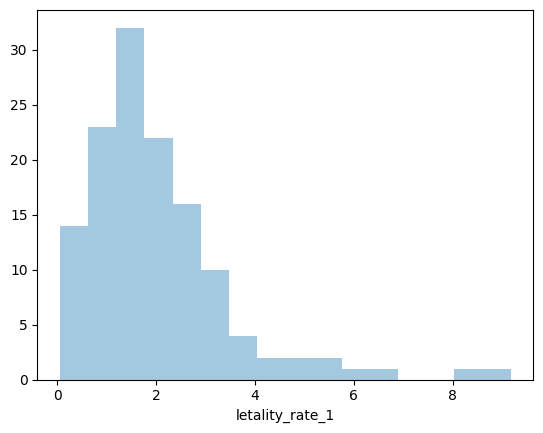

In [65]:
sns.distplot(combined.query("confirmed > 10000")['letality_rate_1'], kde= False)


C:\Users\luist\AppData\Local\Temp\ipykernel_10132\1668828573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.query("recovered > 10000")['letality_rate_2'], kde= False)


<AxesSubplot: xlabel='letality_rate_2'>

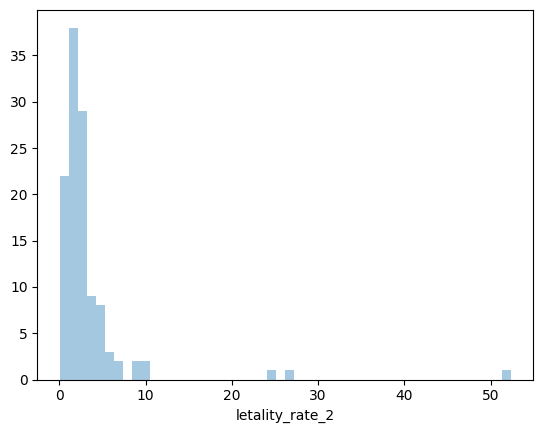

In [66]:
sns.distplot(combined.query("recovered > 10000")['letality_rate_2'], kde= False)


In [67]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 10000")

,confirmed,deaths,recovered,letality_rate_2,letality_rate_1
Country/Region,,,,,
Peru,1060567,97325,984726,8.994493,9.176695
Mexico,1649502,141248,1237321,10.245987,8.563069
Syria,13132,841,6624,11.265908,6.404203
Ecuador,231644,14322,199332,6.703362,6.182763
Sudan,28317,1603,15688,9.270719,5.660910
...,...,...,...,...,...
Bahrain,97940,360,94646,0.378923,0.367572
Maldives,14582,49,13566,0.359897,0.336031
United Arab Emirates,256732,751,228364,0.327783,0.292523


In [68]:
def latest_by_country_at(data, date):
    return data.groupby("Country/Region").sum[date]

In [71]:
def latest_by_country_at(data, date):
    return data.groupby("Country/Region").sum()[date]

informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64